In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import gudhi as gd
# from gudhi.tensorflow import RipsLayer
from gudhi.representations import Landscape
# import tensorflow as tf
import utils as u
import calendar 
from datetime import datetime
import matplotlib.dates as mdates

In [2]:
data = pd.read_csv('monsoon.csv', header=None)

In [3]:
# Add date column
dates = []
start = 1
for year in range(1948, 2016):
    if calendar.isleap(year):
        days = 366
    else:
        days = 365
    for day in range(1, days+1):
        day = str(day).zfill(3)
        res = datetime.strptime(str(year) + "-" + day, "%Y-%j").strftime("%m-%d-%Y")
        dates.append(res)
data['Date']=dates
data['Date'] = pd.to_datetime(data['Date'])
data=data.set_index('Date')
data=data.drop(0, axis=1)
data.rename(columns={1: 'rain'}, inplace=True)

In [5]:
year = 1972
data1 = data.loc[f'{year}-01-01':f'{year}-12-31']
window_size = 30
delay = 7

In [4]:
data1

NameError: name 'data1' is not defined

In [5]:
dgms = np.empty(len(data1)-window_size, dtype=object)
for i in range(len(data1)-window_size):
    window = data1['rain'][i:i+window_size].values
    X = np.zeros((window_size-delay, delay), dtype=float)
    for j in range(window_size-delay):
        X[j,:] = window[j:j+delay]

    rc = gd.RipsComplex(points=X).create_simplex_tree(max_dimension=2)  
    rc.persistence()
    dgm = rc.persistence_intervals_in_dimension(1) 
    dgms[i]=dgm    


In [6]:
# Now compute the norms of landscapes:
norms = np.zeros(dgms.shape[0])
for i in range(dgms.shape[0]):
    l=Landscape(num_landscapes=2,resolution=10).fit_transform([dgms[i]])
    norms[i]  = np.linalg.norm(l[0])
month_locator = mdates.MonthLocator()
fig, ax = plt.subplots(figsize=(12, 8))
month_year_formatter = mdates.DateFormatter('%b')
ax.xaxis.set_minor_locator(month_locator)
ax.xaxis.set_major_formatter(month_year_formatter)
ax.plot(data1.index[:-window_size], norms)
ax.set_title(f'Year: {year}')
ax2=ax.twinx()
ax2.plot(data1.index[:-window_size], data1['rain'][:-window_size], c='k', alpha=0.3)

fig.autofmt_xdate()
pred_onset = data1.iloc[np.where((norms > mean  + 3 * std))[0][0]].name
ax.axvline(pred_onset, c='r')
ax.text(pred_onset,1,pred_onset.strftime('%B %d'),rotation=90)

pred_withdraw = data1.iloc[np.where((norms > mean  + 1 * std))[0][-1]].name
ax.axvline(pred_withdraw, c='r')
ax.text(pred_withdraw,5, pred_withdraw.strftime('%B %d'),rotation=90)
plt.show()


NameError: name 'dgms' is not defined

NameError: name 'dgms' is not defined

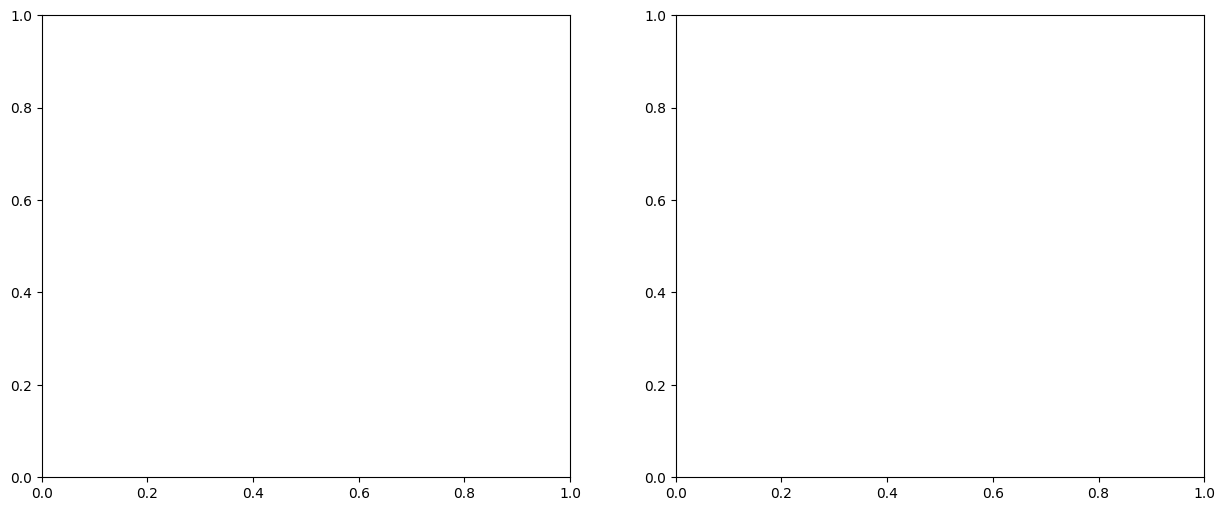

In [7]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,6))
gd.plot_persistence_diagram(dgms[0], colormap=[[1,0,0]], alpha=0.5, axes=ax1)
gd.plot_persistence_diagram(dgms[np.where(norms > mean  + 3 * std )[0][0]], colormap=[[1,0,0]], alpha=0.5, axes=ax2)

for a in [ax1,ax2]:
    a.set_xlim(2,20)
    a.set_ylim(2,20)

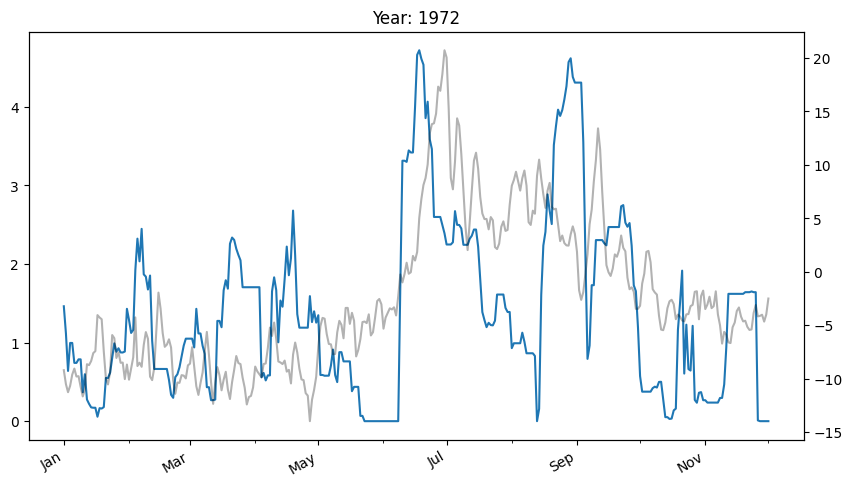

In [8]:
# Now compute the norms of landscapes:
norms_diff = np.zeros(dgms.shape[0])
# for i in range(1, dgms.shape[0]):
#     l=Landscape(num_landscapes=5,resolution=20).fit_transform([dgms[i], dgms[i-1]])
#     norms_diff[i]  = np.linalg.norm(l[0])
l = Landscape(num_landscapes=5,resolution=20).fit_transform(dgms)
diff_l = np.diff(l)
norms_diff = np.linalg.norm(diff_l,axis=1)
month_locator = mdates.MonthLocator()
fig, ax = plt.subplots(figsize=(10, 6))
month_year_formatter = mdates.DateFormatter('%b')
ax.xaxis.set_minor_locator(month_locator)
ax.xaxis.set_major_formatter(month_year_formatter)
ax.plot(data1.index[:-window_size], norms_diff)
ax.set_title(f'Year: {year}')
ax2=ax.twinx()
ax2.plot(data1.index[:-window_size], data1['rain'][:-window_size], c='k', alpha=0.3)

fig.autofmt_xdate()
plt.show()

In [9]:
# Write a function
def myFuc():
    pass